## All the techniques of handling missing values

* CCA (Complete Case analysis)
* Mean/ median/(For numerical data)
* Arbitrary imputation
* Random sample imputation(For both numerical & categorical data)
* Capturing NaN value with a new feature
* End of distribution imputation
* Most Frequent categories imputation (Mode)

# Arbitrary value imputation
This technique was derived from kaggle competition. It consists of replacing NaN by arbitrary values  (replacing NaN values with any number (for numerical data) and with any word  (for categorical data)). In simple words add something which has not in our data already

## When to use it?
* When data is not missing completely at Random  (NMCAR)

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/home/saad/Downloads/train.csv',usecols=['LotFrontage','MasVnrArea','MoSold','SalePrice'])
df.head()

,LotFrontage,MasVnrArea,MoSold,SalePrice
0,65.0,196.0,2,208500
1,80.0,0.0,5,181500
2,68.0,162.0,9,223500
3,60.0,0.0,2,140000
4,84.0,350.0,12,250000


In [4]:
df.isnull().sum()

LotFrontage    259
MasVnrArea       8
MoSold           0
SalePrice        0
dtype: int64

In [5]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train['LotFrontage_99'] = X_train['LotFrontage'].fillna(99)
X_train['LotFrontage_minus1'] = X_train['LotFrontage'].fillna(-1)

X_train['MasVnrArea_999'] = X_train['MasVnrArea'].fillna(999)
X_train['MasVnrArea_minus1'] = X_train['MasVnrArea'].fillna(-1)

In [8]:
print('Original LotFrontage variable variance:            ', X_train['LotFrontage'].var())
print('LotFrontage Variance after 99 wala imputation:     ', X_train['LotFrontage_99'].var())
print('LotFrontage Variance after -1 wala imputation:     ', X_train['LotFrontage_minus1'].var())
print()
print()
print('Original MasVnrArea variable variance:             ', X_train['MasVnrArea'].var())
print('MasVnrArea Variance after 999 wala imputation:     ', X_train['MasVnrArea_999'].var())
print('MasVnrArea Variance after -1 wala imputation:      ', X_train['MasVnrArea_minus1'].var())

Original LotFrontage variable variance:             613.4394886321045
LotFrontage Variance after 99 wala imputation:      627.0317404420675
LotFrontage Variance after -1 wala imputation:      1228.2669061285867


Original MasVnrArea variable variance:              31936.277839300714
MasVnrArea Variance after 999 wala imputation:      31772.09366893223
MasVnrArea Variance after -1 wala imputation:       31824.8510024531


In [9]:
def figure_plt(df, feature1, feature2, feature3):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # original variable distribution
    df[feature1].plot(kind='kde', ax=ax)

    # variable imputed with the median
    df[feature2].plot(kind='kde', ax=ax, color='r')

    # variable imputed with the mean
    df[feature3].plot(kind='kde', ax=ax, color='y')

    # add legends
    plt.legend()
    #lines, labels = ax.get_legend_handles_labels()
    #ax.legend(lines, labels, loc='best')
    
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

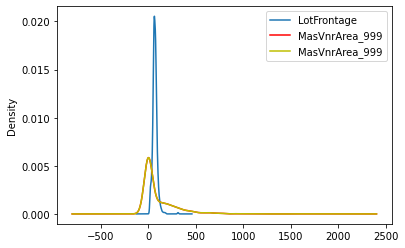

In [10]:
figure_plt(X_train, 'LotFrontage', 'MasVnrArea_999', 'MasVnrArea_999')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

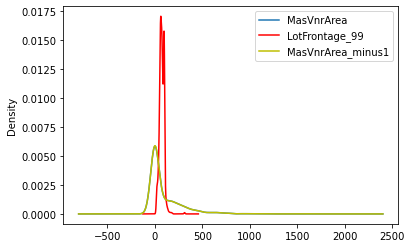

In [11]:
figure_plt(X_train, 'MasVnrArea', 'LotFrontage_99', 'MasVnrArea_minus1')

In [12]:
X_train.cov()

,LotFrontage,MasVnrArea,MoSold,LotFrontage_99,LotFrontage_minus1,MasVnrArea_999,MasVnrArea_minus1
LotFrontage,613.439489,950.593000,0.639980,613.439489,613.439489,945.673027,943.748439
MasVnrArea,950.593000,31936.277839,3.270333,824.866864,693.453058,31936.277839,31936.277839
MoSold,0.639980,3.270333,7.378056,0.265976,1.178117,3.237829,2.239337
LotFrontage_99,613.439489,824.866864,0.265976,627.031740,214.666878,820.602135,819.089651
LotFrontage_minus1,613.439489,693.453058,1.178117,214.666878,1228.266906,689.859598,688.068329
MasVnrArea_999,945.673027,31936.277839,3.237829,820.602135,689.859598,31772.093669,31772.897451
MasVnrArea_minus1,943.748439,31936.277839,2.239337,819.089651,688.068329,31772.897451,31824.851002


In [13]:
X_train.corr()

,LotFrontage,MasVnrArea,MoSold,LotFrontage_99,LotFrontage_minus1,MasVnrArea_999,MasVnrArea_minus1
LotFrontage,1.000000,0.211135,0.009521,1.000000,1.000000,0.210556,0.209963
MasVnrArea,0.211135,1.000000,0.006746,0.184330,0.110742,1.000000,1.000000
MoSold,0.009521,0.006746,1.000000,0.003910,0.012376,0.006687,0.004621
LotFrontage_99,1.000000,0.184330,0.003910,1.000000,0.244610,0.183851,0.183360
LotFrontage_minus1,1.000000,0.110742,0.012376,0.244610,1.000000,0.110431,0.110053
MasVnrArea_999,0.210556,1.000000,0.006687,0.183851,0.110431,1.000000,0.999196
MasVnrArea_minus1,0.209963,1.000000,0.004621,0.183360,0.110053,0.999196,1.000000


<AxesSubplot:>

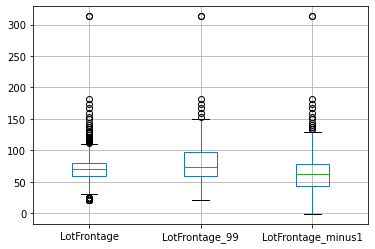

In [14]:
X_train[['LotFrontage','LotFrontage_99','LotFrontage_minus1']].boxplot()

<AxesSubplot:>

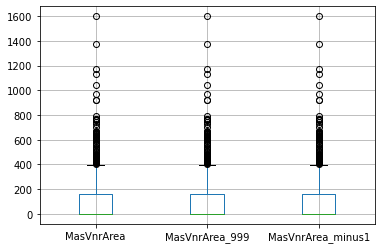

In [15]:
X_train[['MasVnrArea','MasVnrArea_999','MasVnrArea_minus1']].boxplot()

## Using Sklearn

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [18]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['LotFrontage']),
    ('imputer2',imputer2,['MasVnrArea'])
],remainder='passthrough')

In [19]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['MasVnrArea'])])

In [20]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [21]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [22]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [23]:
X_train

array([[ 80., 320.,   9.],
       [ 70.,   0.,   7.],
       [ 24.,   0.,   6.],
       ...,
       [ 70.,   0.,   6.],
       [ 67., 268.,  11.],
       [ 60.,   0.,   7.]])

## Advantage

* Easy to use
* It is useful when your data is not missing completely at random

## Disadvantage

* Change or Distortion in the original variance of the Data  (change the distribution of the data)
* Arbitrary imputation deosn't preserve relationship between variables such as correlation  (covariance & correlation changes)
* Some times it increase the outliers and some times it decreases and some times outliers remains constantm